In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
def parse_simulation(file_path):
    bodies_data = []
    motion_data = []
    stepsize = None
    
    # Flags to identify sections
    bodies_section = False
    motion_section = False
    
    # Open and read the file line by line
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line == 'BODIES':
                bodies_section = True
                motion_section = False
            elif line == 'MOTION':
                bodies_section = False
                motion_section = True
            elif line.startswith('STEPSIZE:'):
                stepsize = float(line.split()[1])
            elif bodies_section and line:
                if not line.startswith('id'):  # Skip the header line
                    bodies_data.append(line.split(', '))
            elif motion_section and line:
                if not line.startswith('timestep'):  # Skip the header line
                    motion_data.append(line.split(', '))
    
    # Create DataFrames from the collected data
    bodies_df = pd.DataFrame(bodies_data, columns=['id', 'mass', 'x', 'y', 'Vx', 'Vy', 'moves'])
    motion_df = pd.DataFrame(motion_data, columns=['timestep', 'id', 'x', 'y', 'Vx', 'Vy'])
    
    # Convert appropriate columns to numeric types
    bodies_df = bodies_df.apply(pd.to_numeric)
    motion_df = motion_df.apply(pd.to_numeric)
    return bodies_df, motion_df, stepsize

In [58]:
path = 'build/simulation.txt'

planets, motion, stepsize = parse_simulation(path)
display(planets.head())
display(motion.head())
print(f"seconds per timestep: {stepsize}")

,id,mass,x,y,Vx,Vy,moves
0,0,1.989000e+30,0.000000e+00,0.0,0.0,0.0,1
1,1,5.972000e+24,1.500000e+11,0.0,0.0,29850.0,1


,timestep,id,x,y,Vx,Vy
0,0,0,6.612116e+01,0.000000e+00,0.001531,0.000000
1,0,1,1.499780e+11,2.579040e+09,-509.767000,29850.000000
2,1,0,2.644748e+02,1.136857e+00,0.003061,0.000026
3,1,1,1.499119e+11,5.157701e+09,-1019.458000,29841.240000
4,2,0,5.950211e+02,5.684099e+00,0.004591,0.000079


seconds per timestep: 86400.0


<Axes: xlabel='x', ylabel='y'>

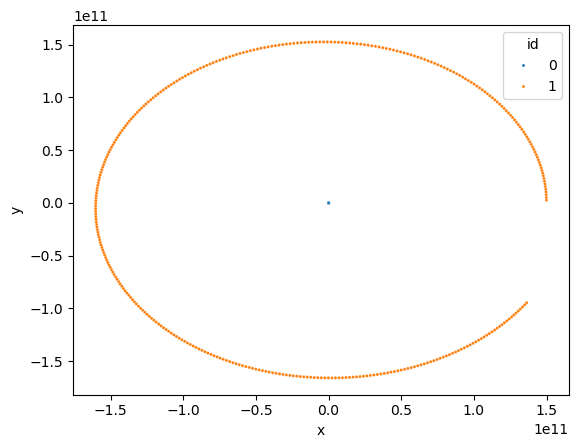

In [59]:
sns.scatterplot(motion , x='x', y='y', hue='id', s=5)